# 1. Importación de librerías y carga de datos

In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import os

In [ ]:
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
# Load dataset of positions
DATASETS_FOLDER = os.path.join("TFM", "implementation", "datasets")
DATASET_FILE = os.path.join(DATASETS_FOLDER, "positions.csv")
df = pd.read_csv(DATASET_FILE)
df.head()

,time(s),vehicle_id,victim_id,shape_collider,shape_victim,latitude(m),longitude(m),speed(m/s),heading,acceleration(m/s²),collision
0,1.0,100,-1,delivery,-1,41.392245,2.162762,0.0,45.241513,0.0,0
1,1.0,101,-1,moped,-1,41.390385,2.164237,0.0,133.252622,0.0,0
2,1.0,102,-1,passenger,-1,41.393895,2.162749,0.0,137.914783,0.0,0
3,1.0,103,-1,passenger,-1,41.390752,2.162845,0.0,225.740562,0.0,0
4,1.0,104,-1,motorcycle,-1,41.390913,2.163528,0.0,132.292083,0.0,0


In [ ]:
# Load dataset with vehicles colision
DATASET_COL = os.path.join(DATASETS_FOLDER, "collisions_1k.csv")
df_col = pd.read_csv(DATASET_COL)
df_col = df_col[['vehicle_id', 'victim_id']].astype(int)
df_col.head()

,vehicle_id,victim_id
0,2899,2884
1,8351,8507
2,6705,6636
3,7523,7414
4,651,541


In [ ]:
# Load dataset with vehicles no-colision
DATASET_NOCOL = os.path.join(DATASETS_FOLDER, "no_collisions_1k.csv")
df_nocol = pd.read_csv(DATASET_NOCOL)
df_nocol = df_nocol[['v1', 'v2']]
df_nocol.head()

,v1,v2
0,6.0,85.0
1,29.0,61.0
2,38.0,266.0
3,38.0,300.0
4,38.0,315.0


In [ ]:
# Load dataset with dimensions
DATASET_DIM = os.path.join(DATASETS_FOLDER, "dimensions.csv")
df_dim = pd.read_csv(DATASET_DIM)
df_dim = df_dim[['vehicle_id', 'length', 'width']]
df_dim.head()

,vehicle_id,length,width
0,2,5.0,1.8
1,3,5.0,1.8
2,4,2.2,0.9
3,5,5.0,1.8
4,6,5.0,1.8


# 2. Análisis exploratorio de los datos (EDA)

In [ ]:
# Dataset size
print("positions:", df.shape)
print("Observations: {}".format(df.shape[0]))
print("Variables: {}".format(df.shape[1]))
print("Vehicles: {}".format(len(df.vehicle_id.unique())))
print("dimensions:", df_dim.shape)
print("collisions:", df_col.shape)
print("no_collisions:", df_nocol.shape)

positions: (7914246, 11)
Observations: 7914246
Variables: 11
Vehicles: 9981
dimensions: (9981, 3)
collisions: (1000, 2)
no_collisions: (1000, 2)


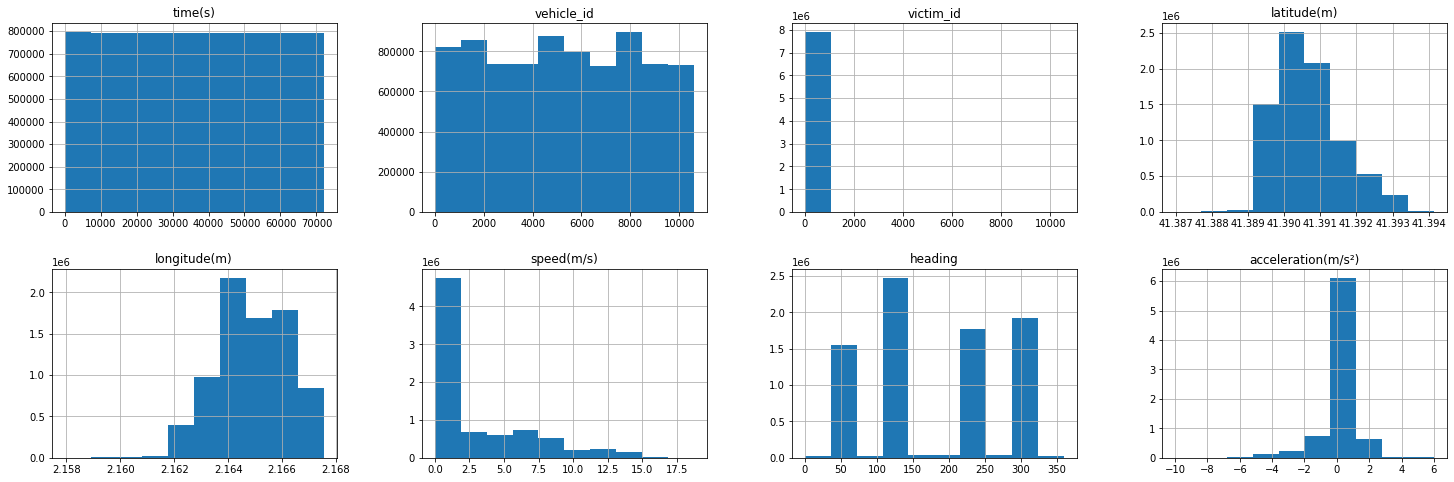

In [ ]:
# Distributions of numerical attributes
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(25,8))
df.hist('time(s)', ax=ax[0][0])
df.hist('vehicle_id', ax=ax[0][1])
df.hist('victim_id', ax=ax[0][2])
df.hist('latitude(m)', ax=ax[0][3])
df.hist('longitude(m)', ax=ax[1][0])
df.hist('speed(m/s)', ax=ax[1][1])
df.hist('heading', ax=ax[1][2])
df.hist('acceleration(m/s²)', ax=ax[1][3])
plt.show()

In [ ]:
# Range of values
print("time(s): [{}, {}]".format(min(df['time(s)']), max(df['time(s)'])))
print("vehicle_id: [{}, {}]".format(min(df['vehicle_id']),
                                    max(df['vehicle_id'])))
print("victim_id: [{}, {}]".format(min(df['victim_id']), max(df['victim_id'])))
print("latitude(m): [{}, {}]".format(min(df['latitude(m)']),
                                     max(df['latitude(m)'])))
print("longitude(m): [{}, {}]".format(min(df['longitude(m)']),
                                      max(df['longitude(m)'])))
print("speed(m/s): [{}, {}]".format(min(df['speed(m/s)']),
                                    max(df['speed(m/s)'])))
print("heading: [{}, {}]".format(min(df['heading']), max(df['heading'])))
print("acceleration(m/s²): [{}, {}]".format(min(df['acceleration(m/s²)']),
      max(df['acceleration(m/s²)'])))

time(s): [1.0, 72000.0]
vehicle_id: [2, 10591]
victim_id: [-1, 10548]
latitude(m): [41.38698443730398, 41.39414143672337]
longitude(m): [2.157936523084977, 2.1675456322138467]
speed(m/s): [0.0, 18.71895238439466]
heading: [0.0002531690841852, 359.99305154630207]
acceleration(m/s²): [-10.0, 5.999999656410755]


In [ ]:
# Number of vehicles stopped or finishing braking
print(len(df[df['speed(m/s)'] == 0]))
print(len(df[df['acceleration(m/s²)'] == 0]))
print(len(df[(df['speed(m/s)'] == 0) & (df['acceleration(m/s²)'] <= 0)]))

3247615
3088925
3247615


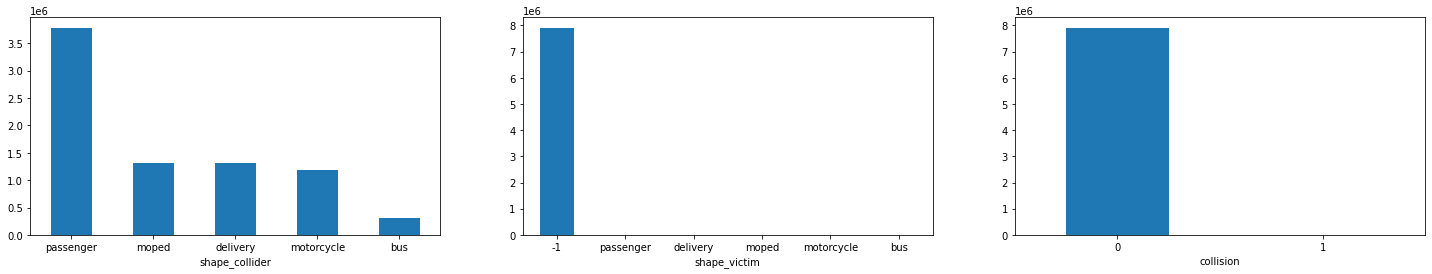

In [ ]:
# Distributions of categorical attributes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,4))
df['shape_collider'].value_counts().plot(kind='bar', rot=0,
                                         xlabel='shape_collider', ax=ax[0])
df['shape_victim'].value_counts().plot(kind='bar', rot=0, xlabel='shape_victim',
                                       ax=ax[1])
df['collision'].value_counts().plot(kind='bar', rot=0, xlabel='collision',
                                    ax=ax[2])
plt.show()

In [ ]:
# Categories counter
print("shape_collider\n--------------")
print(df['shape_collider'].value_counts())
print("\nshape_victim\n------------")
print(df['shape_victim'].value_counts())
print("\ncollision\n---------")
print(df['collision'].value_counts())

shape_collider
--------------
passenger     3781716
moped         1315803
delivery      1306875
motorcycle    1193602
bus            316250
Name: shape_collider, dtype: int64

shape_victim
------------
-1            7910244
passenger        2016
delivery          904
moped             439
motorcycle        345
bus               298
Name: shape_victim, dtype: int64

collision
---------
0    7910244
1       4002
Name: collision, dtype: int64


In [ ]:
df.describe()

,time(s),vehicle_id,victim_id,latitude(m),longitude(m),speed(m/s),heading,acceleration(m/s²),collision
count,7.914246e+06,7.914246e+06,7.914246e+06,7.914246e+06,7.914246e+06,7.914246e+06,7.914246e+06,7.914246e+06,7.914246e+06
mean,3.597629e+04,5.221956e+03,1.692265e+00,4.139066e+01,2.164889e+00,2.770512e+00,1.832808e+02,8.100866e-03,5.056704e-04
std,2.079816e+04,3.048042e+03,1.372514e+02,9.075565e-04,1.285000e-03,3.825446e+00,9.577930e+01,1.149090e+00,2.248143e-02
min,1.000000e+00,2.000000e+00,-1.000000e+00,4.138698e+01,2.157937e+00,0.000000e+00,2.531691e-04,-1.000000e+01,0.000000e+00
25%,1.796300e+04,2.542000e+03,-1.000000e+00,4.138996e+01,2.163923e+00,0.000000e+00,1.346723e+02,-5.912660e-03,0.000000e+00
50%,3.597500e+04,5.171000e+03,-1.000000e+00,4.139053e+01,2.164959e+00,2.055569e-01,1.382813e+02,0.000000e+00,0.000000e+00
75%,5.398800e+04,7.853000e+03,-1.000000e+00,4.139116e+01,2.165942e+00,5.270980e+00,2.526631e+02,2.329420e-01,0.000000e+00
max,7.200000e+04,1.059100e+04,1.054800e+04,4.139414e+01,2.167546e+00,1.871895e+01,3.599931e+02,6.000000e+00,1.000000e+00


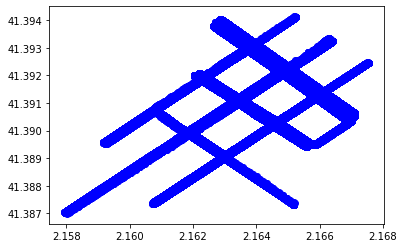

In [ ]:
# Map of coordinates
fig, ax = plt.subplots(1, 1)
plt.plot(df['longitude(m)'], df['latitude(m)'], 'bo')
plt.show()

In [ ]:
# Count time registered per vehicle
df_vehicle_time = (df[['time(s)', 'vehicle_id']].groupby(['vehicle_id']).count()
                   .rename(columns={'time(s)': 'seconds'}))
df_vehicle_time.head()

,seconds
vehicle_id,
2,1828
3,636
4,423
5,44
6,1889


In [ ]:
df_vehicle_time['seconds'].describe()

count    9981.000000
mean      792.931169
std       703.709287
min         3.000000
25%       198.000000
50%       599.000000
75%      1266.000000
max      4721.000000
Name: seconds, dtype: float64